In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px #if using plotly
import geopandas as gpd
import pyproj

# Creates the Index:

df = pd.read_csv("data/merged_data.csv")
crimes = ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',\
          'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',\
          'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',\
          'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',\
          'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',\
          'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON-CRIMINAL',\
          'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',\
          'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION',\
          'RITUALISM', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']

df['ALL CRIMES'] = df[crimes].sum(axis=1)
y = df.loc[:, ['ALL CRIMES']].values
X = df[['FS AGENCIES', 'SB FUNDS', 'MICRO LOANS']].fillna(0)
X = np.concatenate((X, np.ones((X.shape[0])).reshape(-1, 1)), axis = 1)
betas = np.linalg.lstsq(X, y,rcond = None)[0]
error = y - np.matmul(X, betas)

if min(error) >= 0:
    error = error / max(error)
else:
    div = max(max(error), -min(error))
    error = error / div

df["INDEX_ANALYSIS"] = error.reshape(1, 50)[0]
va_int = ['WARD', 'INDEX_ANALYSIS','FS AGENCIES', 'SB FUNDS', 'MICRO LOANS','ALL CRIMES']
df = df[va_int]
df["WARD"] = df["WARD"].astype(str)

fp = "wards geofiles/WARDS_2015.shx"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
map_df = map_df.merge(df, on = 'WARD')


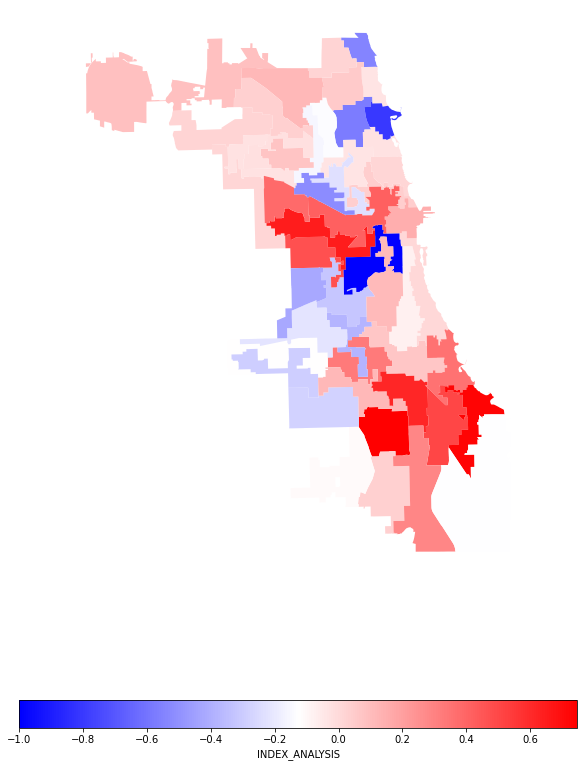

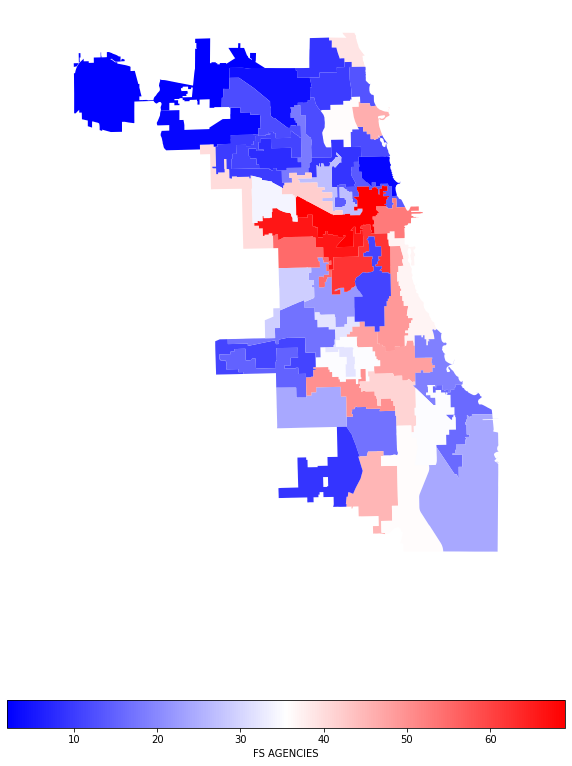

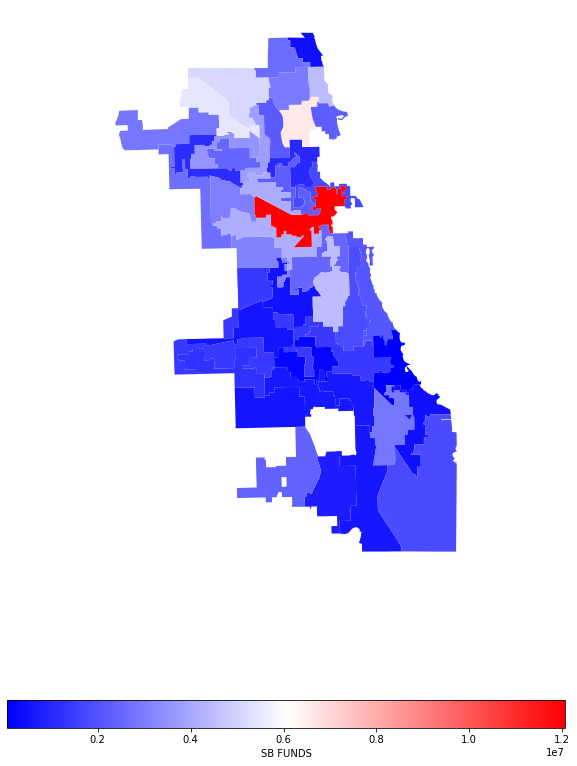

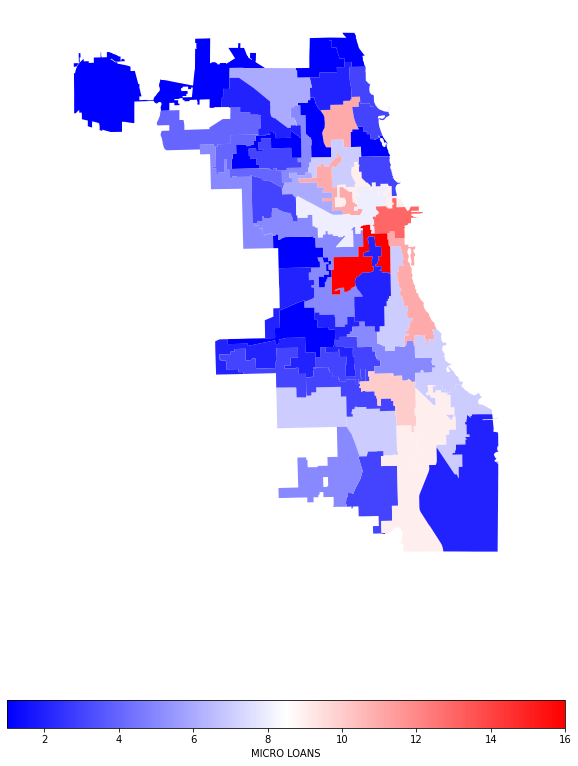

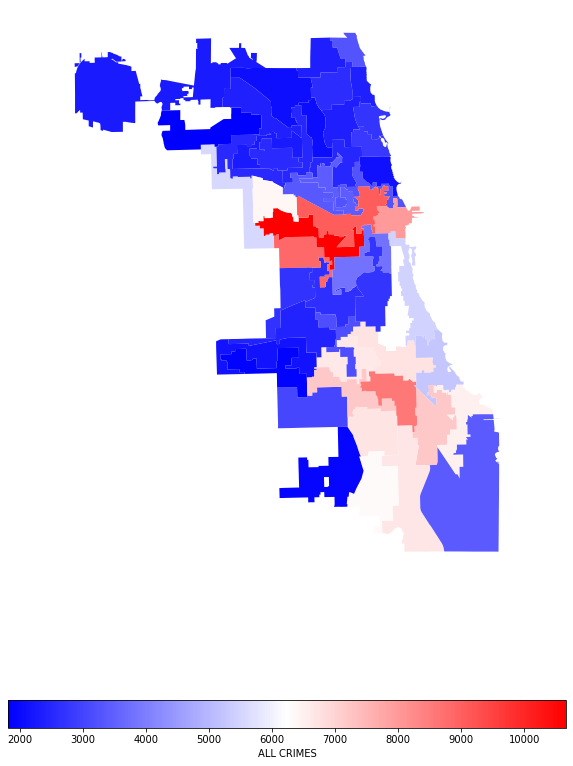

In [106]:
for i in va_int[1:]:
    ax = map_df.plot(i, cmap='bwr',legend=True, figsize=(10, 15), legend_kwds={'label': i, 'orientation': "horizontal"})
    ax.set_axis_off();

In [107]:
map_df.set_index('WARD')

fig = px.choropleth(map_df,
                   geojson=map_df.geometry,
                   locations=map_df.index,
                   color='ALL CRIMES',
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()